<a href="https://colab.research.google.com/github/rubyvanrooyen/notebooks/blob/main/calibration/radio_hub/monitor_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input parameters

In [1]:
#@title ## Monitor TART visibilities.
i = 0 #@param {type:"integer"}
j = 1 #@param {type:"integer"}
#@markdown Interval in ms, between vis requests
interval = 500 #@param {type:"integer"}
#@markdown Number of consecutive datapoints being plotted in time
num = 500 #@param {type:"integer"}
#@markdown Telescope API URL
api = "https://tart.elec.ac.nz/signal" #@param {type:"string"}

# Code

In [2]:
from matplotlib.animation import FuncAnimation
import json
import matplotlib.pyplot as plt
import numpy as np
import requests

In [3]:
def update(frame_number):
    r = requests.get('{}/api/v1/imaging/vis'.format(api))
    r_d = json.loads(r.text)

    for v in r_d['data']:
        if (v['i'] == i) and (v['j'] == j):
            v_comp = complex(v['re'],v['im'])
            vis_ij.append(v_comp)

    data['t'] = np.arange(len(vis_ij))
    data['abs'] = np.abs(vis_ij)
    data['ph'] = np.angle(vis_ij)
    # Update the scatter collection with the new positions.
    scat1.set_offsets(list(zip(data['t'],data['abs'])))
    scat2.set_offsets(list(zip(data['t'],data['ph'])))
    ax.set_xlim(min(data['t'][-num:]),max(data['t'])+1)
    ax2.set_xlim(min(data['t'][-num:]),max(data['t'])+1)

## Plotting animation

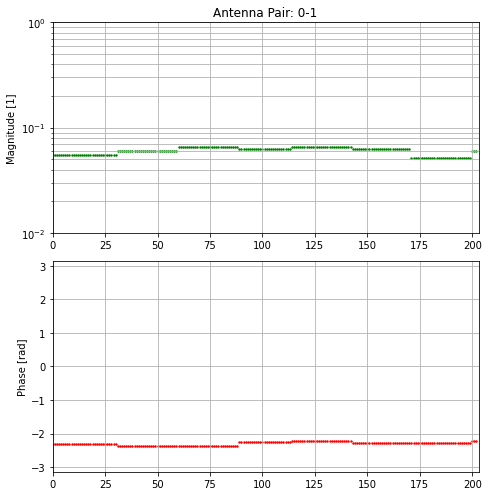

In [4]:
from IPython.display import HTML

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(211)
ax.set_title("Antenna Pair: {}-{}".format(i,j))
ax2 = fig.add_subplot(212)

ax.set_xlim(-1, 1)
ax.set_ylim(0.01, 1)
ax.set_yscale("log", nonposy='clip')
ax.grid(True, which="both")

ax2.set_xlim(-1, 1)
ax2.set_ylim(-np.pi, np.pi)
ax.set_ylabel('Magnitude [1]')
ax2.set_ylabel('Phase [rad]')
ax2.grid(True, which="both")

# Construct the scatter which we will update during animation
data = {'t': [],'abs':[],'ph':[]}
scat1 =  ax.scatter(data['t'],data['abs'], color='green',s=2)
scat2 = ax2.scatter(data['t'],data['ph'], color='red',s=2)

# index i,j
vis_ij = []
anim = FuncAnimation(fig, update, interval=interval)
plt.tight_layout()

anim.save('BrowniamMotion.gif', writer = "pillow", fps=10 )
HTML(anim.to_html5_video())